In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [16]:
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'Temperature')
vibration = ctrl.Antecedent(np.arange(0, 11, 1), 'Vibration')
age = ctrl.Antecedent(np.arange(0, 21, 1), 'Age')
risque = ctrl.Consequent(np.arange(0, 11, 1), 'Risque')

In [17]:
temperature['basse'] = fuzz.trimf(temperature.universe, [0, 0, 40])
temperature['normale'] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature['elevee'] = fuzz.trimf(temperature.universe, [60, 100, 100])

vibration['faible'] = fuzz.trimf(vibration.universe, [0, 0, 4])
vibration['moyenne'] = fuzz.trimf(vibration.universe, [2, 5, 8])
vibration['forte'] = fuzz.trimf(vibration.universe, [6, 10, 10])

age['neuf'] = fuzz.trimf(age.universe, [0, 0, 7])
age['moyen'] = fuzz.trimf(age.universe, [5, 10, 15])
age['ancien'] = fuzz.trimf(age.universe, [12, 20, 20])

risque['faible'] = fuzz.trimf(risque.universe, [0, 0, 4])
risque['moyen'] = fuzz.trimf(risque.universe, [2, 5, 8])
risque['eleve'] = fuzz.trimf(risque.universe, [6, 10, 10])

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1000x600 with 0 Axes>

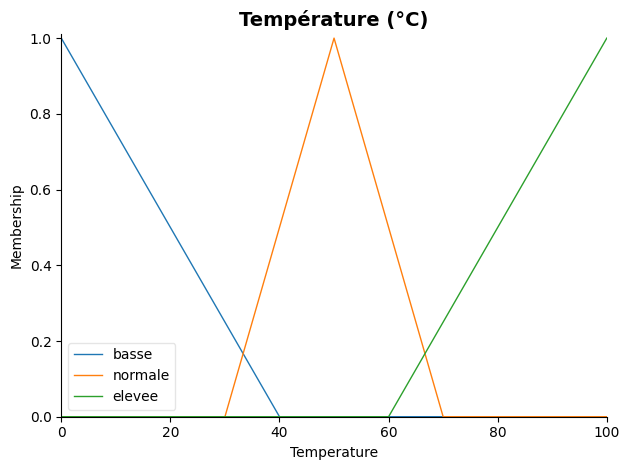

<Figure size 1000x600 with 0 Axes>

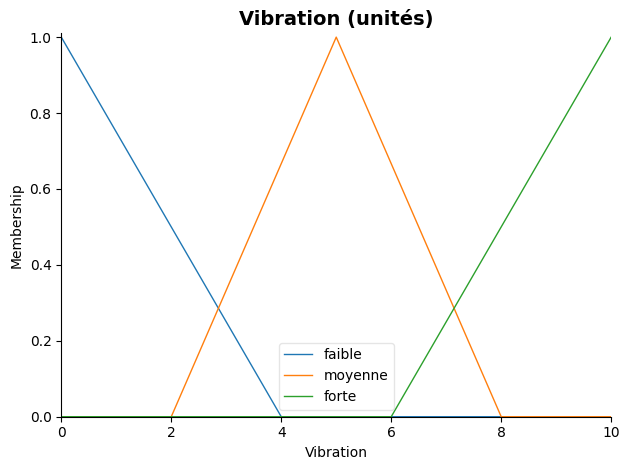

<Figure size 1000x600 with 0 Axes>

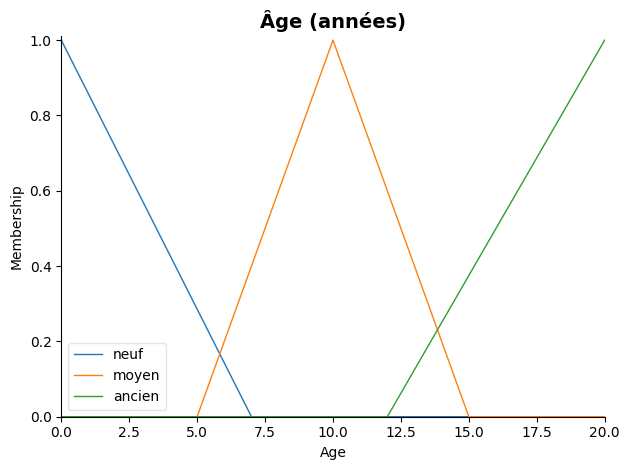

<Figure size 1000x600 with 0 Axes>

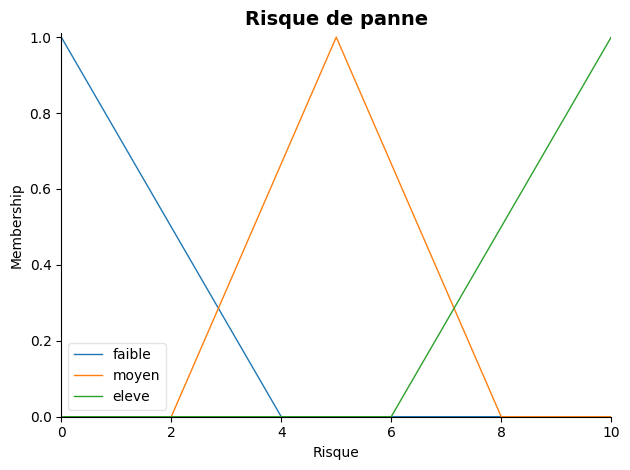

In [18]:
plt.figure(figsize=(10, 6))
temperature.view()
plt.title("Température (°C)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
vibration.view()
plt.title("Vibration (unités)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
age.view()
plt.title("Âge (années)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
risque.view()
plt.title("Risque de panne", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
print("\nRègles d'inférence floues :")
rule1 = ctrl.Rule(temperature['elevee'] | vibration['forte'], risque['eleve'])
print("  R1: Si température élevée OU vibration forte → Risque élevé")

rule2 = ctrl.Rule(age['ancien'] & vibration['moyenne'], risque['moyen'])
print("  R2: Si âge ancien ET vibration moyenne → Risque moyen")

rule3 = ctrl.Rule(temperature['basse'] & vibration['faible'] & age['neuf'], risque['faible'])
print("  R3: Si température basse ET vibration faible ET âge neuf → Risque faible")

rule4 = ctrl.Rule(temperature['normale'] & age['moyen'], risque['moyen'])
print("  R4: Si température normale ET âge moyen → Risque moyen")



Règles d'inférence floues :
  R1: Si température élevée OU vibration forte → Risque élevé
  R2: Si âge ancien ET vibration moyenne → Risque moyen
  R3: Si température basse ET vibration faible ET âge neuf → Risque faible
  R4: Si température normale ET âge moyen → Risque moyen


In [20]:
risque_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
risque_sim = ctrl.ControlSystemSimulation(risque_ctrl)


 TEST DU SYSTÈME FLOU

 Entrées de test :
   • Température : 70°C
   • Vibration   : 6
   • Âge         : 15 ans

Risque prédit (logique floue) : 5.95/10


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1000x600 with 0 Axes>

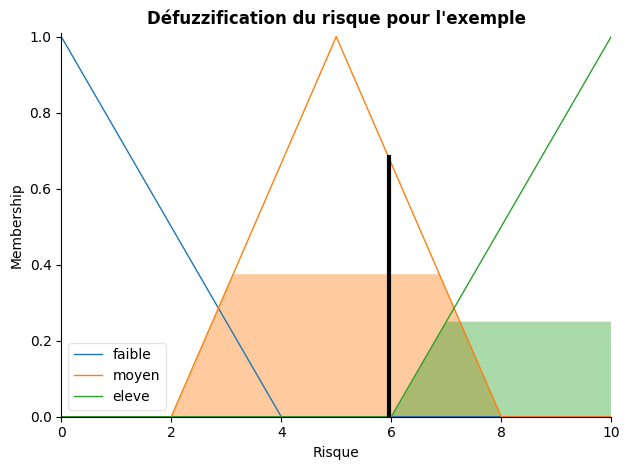

In [27]:
print("\n" + "=" * 60)
print(" TEST DU SYSTÈME FLOU")
print("=" * 60)

exemple_temp = 70
exemple_vib = 6
exemple_age = 15

risque_sim.input['Temperature'] = exemple_temp
risque_sim.input['Vibration'] = exemple_vib
risque_sim.input['Age'] = exemple_age
risque_sim.compute()

print(f"\n Entrées de test :")
print(f"   • Température : {exemple_temp}°C")
print(f"   • Vibration   : {exemple_vib}")
print(f"   • Âge         : {exemple_age} ans")
print(f"\nRisque prédit (logique floue) : {risque_sim.output['Risque']:.2f}/10")

fig = plt.figure(figsize=(10, 6))
risque.view(sim=risque_sim)
plt.title("Défuzzification du risque pour l'exemple", fontweight='bold')
plt.tight_layout()
plt.show()

In [22]:
print("\n" + "=" * 60)
print(" GÉNÉRATION DU DATASET")
print("=" * 60)

n = 2000
print(f"\nGénération de {n} échantillons...")

np.random.seed(42)  # Pour la reproductibilité
temp_vals = np.random.uniform(0, 100, n)
vib_vals = np.random.uniform(0, 10, n)
age_vals = np.random.uniform(0, 20, n)
risque_vals = []

# Barre de progression
for i, (T, V, A) in enumerate(zip(temp_vals, vib_vals, age_vals)):
    if (i + 1) % 500 == 0:
        print(f"  Traité : {i + 1}/{n} échantillons")
    
    risque_sim.input['Temperature'] = float(T)
    risque_sim.input['Vibration'] = float(V)
    risque_sim.input['Age'] = float(A)
    
    try:
        risque_sim.compute()
        risque_vals.append(risque_sim.output['Risque'])
    except:
        # Si le calcul échoue, on utilise une valeur par défaut
        risque_vals.append(5.0)

X = np.column_stack((temp_vals, vib_vals, age_vals))
y = np.array(risque_vals)

print(f"\n Dataset généré : {X.shape[0]} échantillons, {X.shape[1]} features")
print(f"   Statistiques du risque :")
print(f"   • Min  : {y.min():.2f}")
print(f"   • Max  : {y.max():.2f}")
print(f"   • Moy  : {y.mean():.2f}")
print(f"   • Std  : {y.std():.2f}")



 GÉNÉRATION DU DATASET

Génération de 2000 échantillons...
  Traité : 500/2000 échantillons
  Traité : 1000/2000 échantillons
  Traité : 1500/2000 échantillons
  Traité : 2000/2000 échantillons

 Dataset généré : 2000 échantillons, 3 features
   Statistiques du risque :
   • Min  : 1.35
   • Max  : 8.67
   • Moy  : 6.55
   • Std  : 1.97


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nSéparation des données :")
print(f"  • Entraînement : {X_train.shape[0]} échantillons")
print(f"  • Test         : {X_test.shape[0]} échantillons")

model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
print(f"\nEntraînement du Random Forest (150 arbres)...")
model.fit(X_train, y_train)
print(" Modèle entraîné avec succès")

y_pred = model.predict(X_test)



Séparation des données :
  • Entraînement : 1600 échantillons
  • Test         : 400 échantillons

Entraînement du Random Forest (150 arbres)...
 Modèle entraîné avec succès


In [24]:
print("\n" + "=" * 60)
print("ÉVALUATION DU MODÈLE ML")
print("=" * 60)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n{'='*60}")
print(f"{'MÉTRIQUES DE PERFORMANCE':^60}")
print(f"{'='*60}")
print(f"\n  ┌{'─'*56}┐")
print(f"  │  {'MAE  (Erreur absolue moyenne)':<35} : {mae:>8.4f}  │")
print(f"  ├{'─'*56}┤")
print(f"  │  {'MSE  (Erreur quadratique moyenne)':<35} : {mse:>8.4f}  │")
print(f"  ├{'─'*56}┤")
print(f"  │  {'RMSE (Racine de MSE)':<35} : {rmse:>8.4f}  │")
print(f"  ├{'─'*56}┤")
print(f"  │  {'R²   (Coefficient de détermination)':<35} : {r2:>8.4f}  │")
print(f"  └{'─'*56}┘")
print(f"\n{'='*60}")

if r2 > 0.95:
    print("\n  Excellente performance ! Le modèle capture très bien la logique floue.")
elif r2 > 0.85:
    print("\n  Bonne performance ! Le modèle généralise bien.")
else:
    print("\n   Performance à améliorer.")



ÉVALUATION DU MODÈLE ML

                  MÉTRIQUES DE PERFORMANCE                  

  ┌────────────────────────────────────────────────────────┐
  │  MAE  (Erreur absolue moyenne)       :   0.0617  │
  ├────────────────────────────────────────────────────────┤
  │  MSE  (Erreur quadratique moyenne)   :   0.0208  │
  ├────────────────────────────────────────────────────────┤
  │  RMSE (Racine de MSE)                :   0.1442  │
  ├────────────────────────────────────────────────────────┤
  │  R²   (Coefficient de détermination) :   0.9945  │
  └────────────────────────────────────────────────────────┘


  Excellente performance ! Le modèle capture très bien la logique floue.


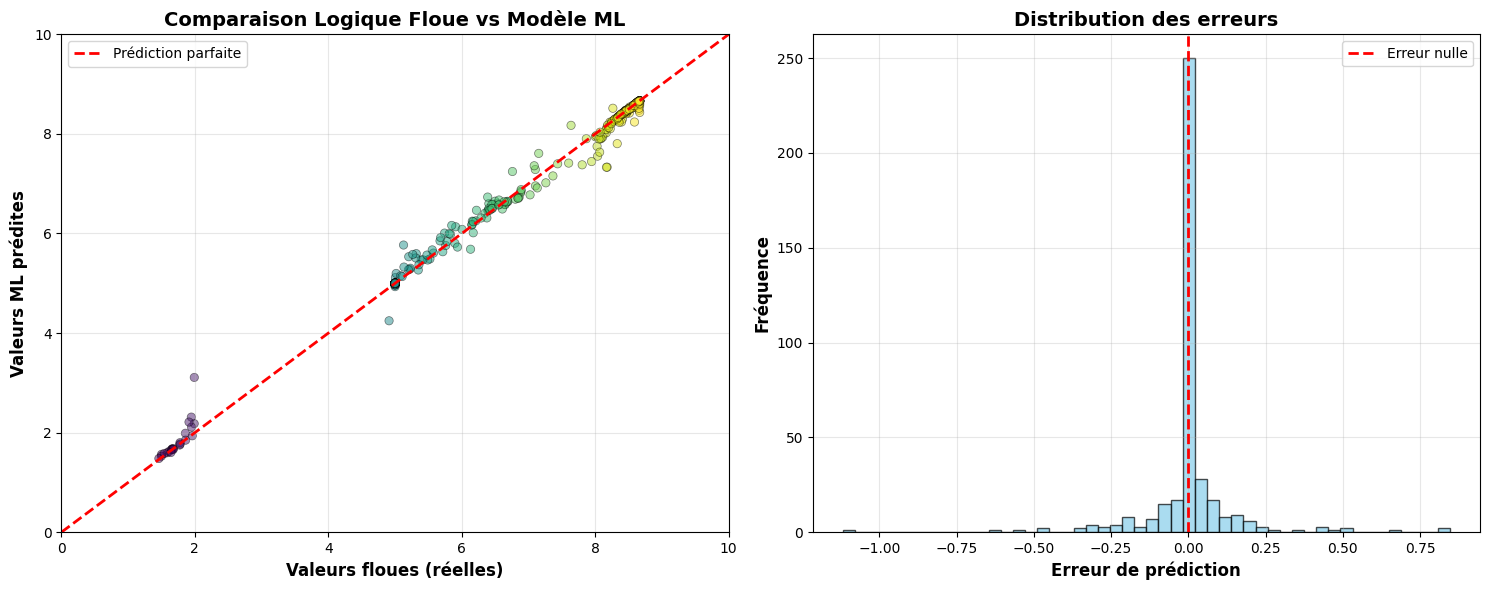

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
axes[0].scatter(y_test, y_pred, alpha=0.5, c=y_test, cmap='viridis', edgecolors='k', linewidth=0.5)
axes[0].plot([0, 10], [0, 10], 'r--', linewidth=2, label='Prédiction parfaite')
axes[0].set_xlabel("Valeurs floues (réelles)", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Valeurs ML prédites", fontsize=12, fontweight='bold')
axes[0].set_title("Comparaison Logique Floue vs Modèle ML", fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 10])
axes[0].set_ylim([0, 10])

# Histogramme des erreurs
errors = y_test - y_pred
axes[1].hist(errors, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erreur nulle')
axes[1].set_xlabel("Erreur de prédiction", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Fréquence", fontsize=12, fontweight='bold')
axes[1].set_title("Distribution des erreurs", fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Comparaison entre la logique floue et le modèle Machine Learning

### 1. Avantages de la logique floue
- **Explicabilité :**  
  La logique floue permet de comprendre clairement les décisions du système grâce aux règles linguistiques.  
  Chaque règle est interprétable et montre comment les entrées (Distance_to_next_car, Speed_change) influencent la sortie (Acceleration_Adjust).  
- **Robustesse face à l’incertitude :**  
  Le système peut gérer des valeurs imprécises ou floues, ce qui est utile dans des environnements réels où les mesures ne sont pas parfaites.

### 2. Avantages du Machine Learning
- **Précision :**  
  Le modèle de régression (Random Forest) prédit l’ajustement de l’accélération avec une erreur très faible :  
  - MAE : 0.0335  
  - MSE : 0.0058  
  Cela montre que le ML peut approximer très précisément la sortie floue sur de nouvelles données.  
- **Généralisation :**  
  Le modèle ML peut apprendre automatiquement des relations complexes entre les variables et s’adapter à des ensembles de données plus larges ou différents sans avoir à définir explicitement les règles.

### 3. Synthèse
| Méthode        | Avantages principaux              |
|----------------|---------------------------------|
| Logique floue  | Explicabilité, règles compréhensibles, robustesse aux incertitudes |
| Machine Learning | Précision, généralisation, capacité à modéliser des relations complexes |
